In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import data , units = mW/(m^2 nm)

columns = ['wavelength','DHI (direct)','DDHI (diffused)','reflected','uavg1','uavg2','uavg']

z1 = pd.read_csv(r'C:\Users\nadia\Desktop\report1\libRadtran data\1.out', delimiter=r"\s+", names=columns)
z10 = pd.read_csv(r'C:\Users\nadia\Desktop\report1\libRadtran data\10.out', delimiter=r"\s+", names=columns)
z20 = pd.read_csv(r'C:\Users\nadia\Desktop\report1\libRadtran data\20.out', delimiter=r"\s+", names=columns)
z40 = pd.read_csv(r'C:\Users\nadia\Desktop\report1\libRadtran data\40.out', delimiter=r"\s+", names=columns)
z60 = pd.read_csv(r'C:\Users\nadia\Desktop\report1\libRadtran data\60.out', delimiter=r"\s+", names=columns)
z80 = pd.read_csv(r'C:\Users\nadia\Desktop\report1\libRadtran data\80.out', delimiter=r"\s+", names=columns)

In [55]:
z1.head()

,wavelength,DHI (direct),DDHI (diffused),reflected,uavg1,uavg2,uavg,flux,GHI (global)
0,300.0,5.607888,3.984873,3.504307e-16,0.446329,0.59873,5.577277e-17,7.008613e-16,9.592761
1,310.0,88.942160,65.203480,-1.206311e-14,7.078870,10.28558,-3.198261e-15,-4.019053e-14,154.145640
2,320.0,242.306200,159.796400,-1.972058e-14,19.285050,25.94566,-5.535622e-15,-6.956268e-14,402.102600
3,330.0,464.388900,269.910100,-1.184259e-13,36.960520,44.95897,-2.422810e-14,-3.044593e-13,734.299000
4,340.0,474.054500,233.244200,1.247416e-13,37.729800,39.65842,3.999814e-14,5.026315e-13,707.298700


In [4]:
# actinic flux

for file in [z1, z10, z20, z40, z60, z80]:
    file['flux'] = file['uavg']*4*np.pi
    file['GHI (global)'] = file['DHI (direct)'] + file['DDHI (diffused)']

In [51]:
# import extraterrestrial data 

kurudz = pd.read_fwf(r'C:\Users\nadia\Desktop\MSc\Radiation and Atmosphere Interaction\report0\arxeia\kurudz_1.0nm.dat', delimiter='\t', header=None, encoding='latin1',sep='\t', skiprows = 11)

kurudz[0] = kurudz[0].str.strip()
kurudz[['wavelength','radiation']] = kurudz[0].str.split(' ', n=1, expand=True)
kurudz[['wavelength','radiation']] = kurudz[['wavelength','radiation']].astype(float)
kurudz = kurudz.drop(kurudz[kurudz.wavelength>4000].index)
kurudz = kurudz.drop(kurudz[kurudz.wavelength<290].index)
                     
kurudz = kurudz.reset_index(drop = True)

kurudz_new_wave = kurudz.groupby(kurudz.index//20)['wavelength'].mean().reset_index(drop=True)
kurudz_new_rad = kurudz.groupby(kurudz.index//20)['radiation'].mean().reset_index(drop=True)

In [5]:
z20.head()

,wavelength,DHI (direct),DDHI (diffused),reflected,uavg1,uavg2,uavg,flux,GHI (global)
0,300.0,3.953948,3.116686,-2.221641e-16,0.334838,0.470337,-8.365915e-17,-1.051292e-15,7.070634
1,310.0,74.286190,59.863070,-2.038131e-14,6.290894,9.502486,-5.658462e-15,-7.110633e-14,134.149260
2,320.0,211.068800,152.318700,2.707074e-14,17.874270,24.919530,8.303433e-15,1.043440e-13,363.387500
3,330.0,413.704500,262.246700,-5.621025e-13,35.034390,44.066710,-1.085605e-13,-1.364211e-12,675.951200
4,340.0,425.324900,227.535100,-1.046829e-13,36.018460,39.077330,-1.616946e-14,-2.031914e-13,652.860000


In [46]:
def plot(file, rad, ylabel, title,color):
    plt.plot(file['wavelength'], file[rad], markersize = 1, color=color)
    plt.xlabel("wavelegth (nm)",fontsize = 14)
    plt.ylabel(ylabel,fontsize = 14)
    plt.title(label=title,fontsize = 15)
    plt.grid()

### Figures of direct, diffused and global radiation

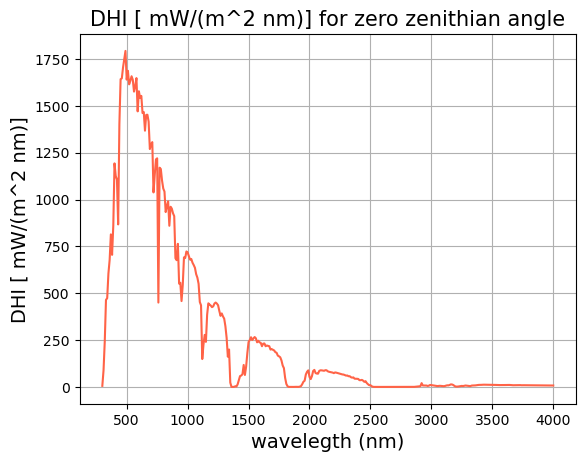

In [47]:
# plotting the dirrect, diffuse and global irradiances for z=0

plot(z1, 'DHI (direct)', "DHI [ mW/(m^2 nm)]", "DHI [ mW/(m^2 nm)] for zero zenithian angle",'tomato')

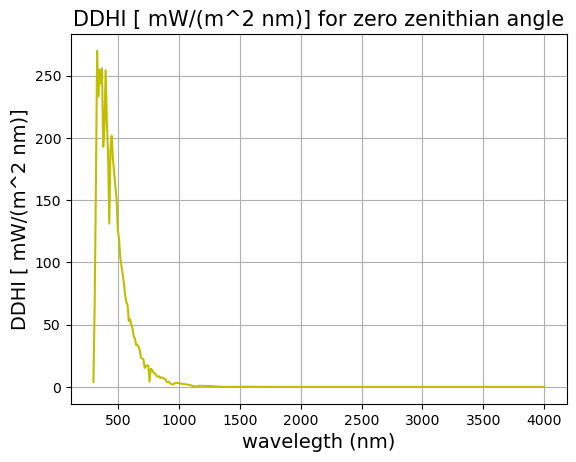

In [48]:
plot(z1, 'DDHI (diffused)', "DDHI [ mW/(m^2 nm)]", "DDHI [ mW/(m^2 nm)] for zero zenithian angle",'y')

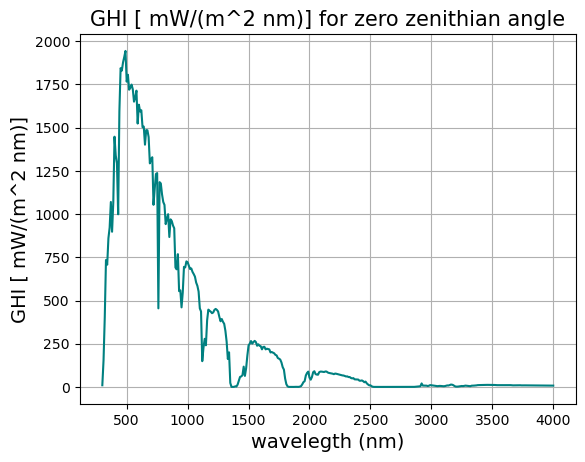

In [49]:
plot(z1, 'GHI (global)', "GHI [ mW/(m^2 nm)]", "GHI [ mW/(m^2 nm)] for zero zenithian angle",'teal')

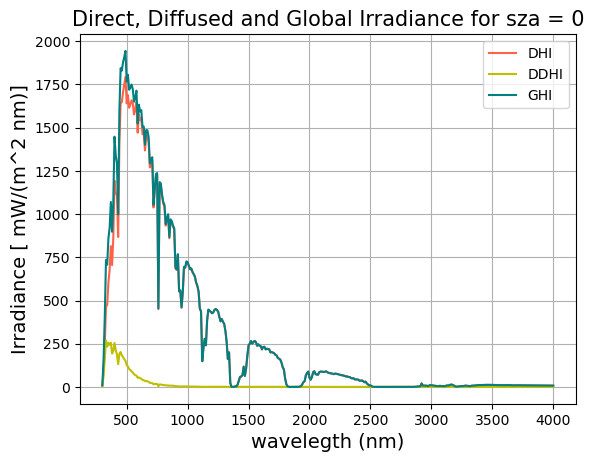

In [50]:
#combined plot for fun
plt.plot(z1['wavelength'], z1['DHI (direct)'], markersize = 1, color ='tomato')
plt.plot(z1['wavelength'], z1['DDHI (diffused)'], markersize = 1, color = 'y')
plt.plot(z1['wavelength'], z1['GHI (global)'], markersize = 1, color = 'teal')
plt.xlabel("wavelegth (nm)",fontsize = 14)
plt.ylabel("Irradiance [ mW/(m^2 nm)]",fontsize = 14)
plt.title(label="Direct, Diffused and Global Irradiance for sza = 0",fontsize = 15)
plt.legend(['DHI', 'DDHI', 'GHI'])
plt.grid()

### Figure of global and extraterrestrial radiation

In [56]:
# plotting function for kurudz 
def waverad(wave,rad,color):
    plt.plot(wave, rad, color=color, markersize = 1)
    plt.xlabel("wavelength (nm)")
    plt.ylabel("radiation(mW/(m2*nm)")

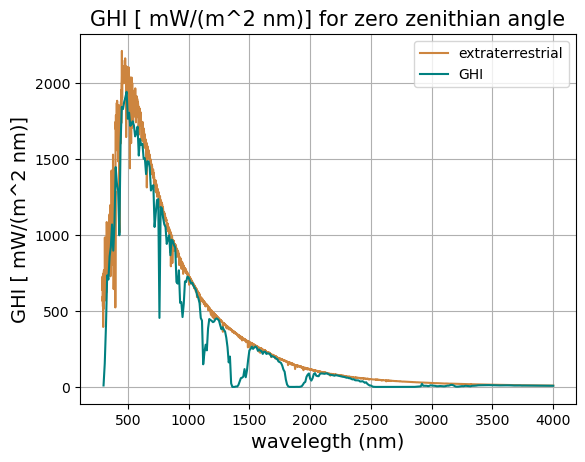

In [59]:
waverad(kurudz['wavelength'],kurudz['radiation'],'peru')
plot(z1, 'GHI (global)', "GHI [ mW/(m^2 nm)]", "GHI [ mW/(m^2 nm)] for zero zenithian angle",'teal')
plt.legend(['extraterrestrial','GHI'])

### Integration and sums of SW, UVB, UVA, VIS and IR for the global irradiance for sza = 0

In [84]:
z1.iloc[2:11]

,wavelength,DHI (direct),DDHI (diffused),reflected,uavg1,uavg2,uavg,flux,GHI (global)
2,320.0,242.3062,159.7964,-1.972058e-14,19.28505,25.94566,-5.535622e-15,-6.956268e-14,402.1026
3,330.0,464.3889,269.9101,-1.184259e-13,36.96052,44.95897,-2.422810e-14,-3.044593e-13,734.2990
4,340.0,474.0545,233.2442,1.247416e-13,37.72980,39.65842,3.999814e-14,5.026315e-13,707.2987
5,350.0,605.4393,254.9187,-6.113116e-13,48.18667,44.20357,-1.007137e-13,-1.265606e-12,860.3580
6,360.0,677.5215,243.9158,-2.747803e-14,53.92366,42.93015,-1.034725e-14,-1.300274e-13,921.4373
7,370.0,814.2499,255.8773,9.391321e-14,64.80582,45.90419,1.629036e-14,2.047107e-13,1070.1272
8,380.0,705.0940,192.8159,1.020991e-13,56.11814,35.04112,-1.917307e-14,-2.409359e-13,897.9099
9,390.0,860.9861,207.6654,-1.412816e-12,68.52554,38.31409,-3.188241e-13,-4.006462e-12,1068.6515
10,400.0,1193.4310,254.3815,3.939407e-12,94.98470,47.49994,9.886539e-13,1.242379e-11,1447.8125


In [90]:
# sums 
SW = np.trapz(z1['GHI (global)'],z1['wavelength']).round(2) # 290-4000 nm 
UVB = np.trapz(z1['GHI (global)'].iloc[0:2],z1['wavelength'].iloc[0:2]).round(2) # 290-320 nm 
UVA = np.trapz(z1['GHI (global)'].iloc[2:11],z1['wavelength'].iloc[2:11]).round(2) # 320-400 nm
VIS = np.trapz(z1['GHI (global)'].iloc[11:41],z1['wavelength'].iloc[11:41]).round(2) # 400-700 nm
IR = np.trapz(z1['GHI (global)'].iloc[41:371],z1['wavelength'].iloc[41:371]).round(2) # 700-4000 nm

In [93]:
# αθροισμα της γλομπαλ για 1 μοίρα -> 1091597.13
SW

1091597.13

In [92]:
print("For sza=0, the irradiation sums are: SW = " + str(SW) + " nm, UVB = " + str(UVB) + " nm, UVA = " + str(UVA) + " nm, VIS = " + str(VIS) + " nm, IR = "+ str(VIS) + "nm")

For sza=0, the irradiation sums are: SW = 1091597.13 nm, UVB = 818.69 nm, UVA = 71850.39 nm, VIS = 466295.96 nm, IR = 466295.96nm


### sza = 0

#### 5 wavelengths with 3 types of radiation 

In [114]:
# SW
glb_sw_0 = np.trapz(z1['GHI (global)'],z1['wavelength']).round(2)
dir_sw_0 = np.trapz(z1['DHI (direct)'],z1['wavelength']).round(2)
dif_sw_0 = np.trapz(z1['DDHI (diffused)'],z1['wavelength']).round(2)
dir_glb_sw_0 = (dir_sw_0 /glb_sw_0).round(2)
dif_glb_sw_0 = (dif_sw_0 /glb_sw_0).round(2) 

In [115]:
print(glb_sw_0)
print(dir_sw_0)
print(dif_sw_0)
print(dir_glb_sw_0)
print(dif_glb_sw_0)

1091597.13
1038535.6
53061.53
0.95
0.05


In [116]:
# UVB
glb_uvb_0 = np.trapz(z1['GHI (global)'].iloc[0:2],z1['wavelength'].iloc[0:2]).round(2)
dir_uvb_0 = np.trapz(z1['DHI (direct)'].iloc[0:2],z1['wavelength'].iloc[0:2]).round(2)
dif_uvb_0 = np.trapz(z1['DDHI (diffused)'].iloc[0:2],z1['wavelength'].iloc[0:2]).round(2)
dir_glb_uvb_0 = (dir_uvb_0 /glb_uvb_0).round(2)
dif_glb_uvb_0 = (dif_uvb_0 /glb_uvb_0).round(2) 

In [117]:
print(glb_uvb_0)
print(dir_uvb_0)
print(dif_uvb_0)
print(dir_glb_uvb_0)
print(dif_glb_uvb_0)

818.69
472.75
345.94
0.58
0.42


Για το 0° έχω βρει UVB:
Dir=2128,99
Dif=1470,94
Glob=3599,93
different results...(?)

In [118]:
# UVA
glb_uva_0 = np.trapz(z1['GHI (global)'].iloc[2:11],z1['wavelength'].iloc[2:11]).round(2)
dir_uva_0 = np.trapz(z1['DHI (direct)'].iloc[2:11],z1['wavelength'].iloc[2:11]).round(2)
dif_uva_0 = np.trapz(z1['DDHI (diffused)'].iloc[2:11],z1['wavelength'].iloc[2:11]).round(2)
dir_glb_uva_0 = (dir_uva_0 /glb_uva_0).round(2)
dif_glb_uva_0 = (dif_uva_0 /glb_uva_0).round(2) 

In [119]:
print(glb_uva_0)
print(dir_uva_0)
print(dif_uva_0)
print(dir_glb_uva_0)
print(dif_glb_uva_0)

71850.39
53196.03
18654.36
0.74
0.26


In [120]:
# VIS
glb_vis_0 = np.trapz(z1['GHI (global)'].iloc[11:41],z1['wavelength'].iloc[11:41]).round(2) 
dir_vis_0 = np.trapz(z1['DHI (direct)'].iloc[11:41],z1['wavelength'].iloc[11:41]).round(2) 
dif_vis_0 = np.trapz(z1['DDHI (diffused)'].iloc[11:41],z1['wavelength'].iloc[11:41]).round(2) 
dir_glb_vis_0 = (dir_vis_0 /glb_vis_0).round(2)
dif_glb_vis_0 = (dif_vis_0 /glb_vis_0).round(2) 

In [121]:
print(glb_vis_0)
print(dir_vis_0)
print(dif_vis_0)
print(dir_glb_vis_0)
print(dif_glb_vis_0)

466295.96
438707.3
27588.66
0.94
0.06


In [122]:
# IR (same results w/ colleagues)
glb_ir_0 = np.trapz(z1['GHI (global)'].iloc[41:371],z1['wavelength'].iloc[41:371]).round(2)
dir_ir_0 = np.trapz(z1['DHI (direct)'].iloc[41:371],z1['wavelength'].iloc[41:371]).round(2)
dif_ir_0 = np.trapz(z1['DDHI (diffused)'].iloc[41:371],z1['wavelength'].iloc[41:371]).round(2)
dir_glb_ir_0 = (dir_ir_0 /glb_ir_0).round(2)
dif_glb_ir_0 = (dif_ir_0 /glb_ir_0).round(2) 

In [123]:
print(glb_ir_0)
print(dir_ir_0)
print(dif_ir_0)
print(dir_glb_ir_0)
print(dif_glb_ir_0)

522675.7
519890.73
2784.96
0.99
0.01


### now lets automate for the rest of the zenithian angle values